## Description


In today's class, we will learn the basics of parameter estimation in the Bayesian framework. In contrast to the frequentist approach that we've seen so far, the Bayesian one assumes that the unknown parameters (such as the mean of the data) are random variables. This is a useful approach to express the uncertainty of estimation.  

Formally, we assume that our data is a sample *conditional* on a parameter value, $X_1, \dots X_n | \theta$. If we know the value of $\theta$, we can write the probability density function of the data. In the context of Bayesian statistics, we refer to this function as the *likelihood*. For example, for a random sample from a normal distribution with an unknown mean $\mu$ and a known variance $\sigma^2$ we would write $X_1, \dots, X_n | \mu \sim \mathcal{N}(\mu, \sigma^2)$. The parameters $\theta$ have their own *prior* distribution that's independent on the data. For example, we may assume that $\mu \sim \mathcal{N}(\mu_0, \sigma_0^2)$. The distribution of the parameters conditional on the data is called the *posterior distribution* and is the result of estimation in the Bayesian framework. In our example, it turns out that

$$ \mu | X_1, \dots, X_n \sim \mathcal{N}\left(\frac{\sigma^{-2}_0\mu_0 + \sigma^{-2}\sum X_i }{\sigma_0^{-2} + n\sigma^{-2}}, \frac{1}{\sigma_0^{-2} + n\sigma^{-2}}\right).$$

The expected value of the parameter under it's posterior distribution is the *Bayesian estimator* of this parameter. In our case, the Bayesian estimator of the mean is equal to $\frac{\sigma^{-2}_0\mu_0 + \sigma^{-2}\sum X_i }{\sigma_0^{-2} + n\sigma^{-2}}$.

The probability distribution of a new data point conditioned on the observed data is called the *posterior predictive*. It's used to predict the values of new observations based on the data. Formally, it's equal to
$$p(\tilde{x} | x_1, \dots, x_n) = \int L(\tilde{x} | \theta) \pi (\theta | x_1, \dots, x_n) d\theta.$$
Basically, this is the likelihood function combined with the posterior distribution of $\theta$. It can be interpreted as a *fitted bayesian model* and used to roughly check whether we have specified our model correctly. However, it's usually broader than the observed distribution of the data, which reflects the uncertainty of prediction. In our case, the posterior predictive is

$$\tilde{X} \sim \mathcal{N}(\mu_0', \sigma_0'^{2} + \sigma^2),$$  

where $\mu_0'$ and $\sigma_0'^2$ are the *posterior* mean and variance of $\mu$ (i.e. $\mu_0'$ is the Bayesian estimator of the mean).  

In general, we can set any distribution as the prior. However, there is a particularly useful type called a *conjugate prior*. Rougly speaking, this is the type of prior that we get if we treat the likelihood as a probability density function for the parameter.

Here is an example of constructing a conjugate prior. If we have a simple observation $X_1 | \mu \sim \mathcal{N}(\mu, \sigma^2)$, the likelihood is equal to

$$L(x_1 | \mu, \sigma^2) = (2\pi\sigma^2)^{-\frac{1}{2}}\exp\left(-\frac{(x_1 - \mu)^2}{2\sigma^2}\right).$$
Now, we treat it as a function of $\mu$ and replace all other parameters with new ones. Let's replace $x_1$ with $\mu_0$ and $\sigma$ with $\sigma_0$. This gives us

$$\tilde{\pi}(\mu | \mu_0, \sigma_0) = (2\pi\sigma_0^2)^{-\frac{1}{2}}\exp\left(-\frac{(\mu_0 - \mu)^2}{2\sigma_0^2}\right).$$

This means that the conjugate prior for $X_1 | \mu \sim \mathcal{N}(\mu, \sigma^2)$, when $\sigma^2$ is known, is also a normal distribution $\mu \sim \mathcal{N}(\mu_0, \sigma_0^2)$. If we have more data points, we do a similar procedure, but we need to remember to start from the *joint likelihood of the whole sample.*

Often, simply replacing parameters will give us a function that does not integrate to 1, i.e. is not a probability density. To get a conjugate prior in this case, we strip all factors that do not depend on $\mu$ from the likelihood, replace all the remaining parameters (including the data) with new ones, and read out what kind of distribution we get based on the parts that depend on $\mu$. In our example, the only part that depends on $\mu$ is $\exp(-(\mu-\mu_0)^2/(2\sigma_0^2))$, which means that this distribution is gaussian.

The parameters of the prior distribution, in our case $\mu_0$ and $\sigma_0$, are assumed to be non-random. They're called the *hyperparameters* to distinguished them from the random ones.



In [ ]:
!pip install gdown
!gdown https://drive.google.com/uc?id=1GW1pjKOCoKOlC4Jqbqql_ghYD_n0iC6O
!gdown https://drive.google.com/uc?id=1FInZ2jrlZGNColU4sHF9JKGHP39fTVut
!gdown https://drive.google.com/uc?id=1n1qS6dcVVKcVJOuUIIm0VTz6cSyrtzDH

## Data & library imports

In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
from scipy.stats import norm, lognorm

In [2]:
income = pd.read_csv('BDL municipality incomes 2015-2020.csv', sep=';', dtype={'Code': 'str'})

## Part 1

In Notebook 4, we have encountered the *variance-bias tradeoff*, where a biased estimator (a geometric mean) gave better results compared to an unbiased one (an arithmentic mean), because it reduced the variance of the estimation.

Bayesian statistics is another approach to deal with the variance-bias tradeoff. It allows us to limit both the bias and the variance of the estimator by setting an appropriate prior distribution.  

How do we set an appropriate prior and its hyperparameters? We guess.
Usually we have some prior knowledge that we can use---for example, we know that the population of a municipality is probably somewhere between 10 people and 10 million people.  
The better our guess, the better the results. As long as we don't make a terrible mistake, we'll be fine.  

Using the random sample to estimate the prior parameters is not a good practice, because it underestimates the uncertainty of estimation. It's better to set very general priors.  

**Exercise 1.** In the first exercise, we'll perform a bayesian estimation of the mean income of municipalities based on a random sample. The sample is already selected in the cell below. For simplicity, we'll assume that the income and its mean are normally distributed, and that the frequentist estimator of the standard deviation always gives us the correct answer (so that we can use a model with a known variance).  

First, using the $3\sigma$ rule, calculate the hyperparameters for priors that assume:
1. 99% probability that the mean income is between $10^4$ and $10^{12}$ PLN (a *weakly informative* prior),
2. 99% probability that the mean income is between $10^6$ and $2\cdot 10^8$ PLN (a *moderately informative* prior),
3. 99% probability that the mean income is between $4\cdot 10^7$ and $6 \cdot 10^7$ PLN (a *strongly informative* prior),
4. 99% probability that the mean income is between $8 \cdot 10^7$ and $10^8$ PLN (a strongly informative, but *incorrect* prior).

Write a function that takes the prior parameters, the mean and standard deviation estimated from the random sample, and the size of the sample, and returns the hyperparameters of the posterior distribution (the posterior mean and standard deviation). You can use the formulas from the description of this notebook or look them up at the [Wikipedia article](https://en.wikipedia.org/wiki/Conjugate_prior).

Using the `norm.pdf` function, compute the posterior probability densities in points given by `x = np.linspace(1e06, 2e08, 501)` for all four priors. Visualize the densities on a plot. Annotate the plot with the true mean income and the value of the frequentist estimator (i.e. the arithmetic mean of the sample). Hint: create a data frame `posterior_pdf = pd.DataFrame({'x': x})` and add columns with the computed density values. Next, use `posterior_pdf = posterior_pdf.melt(id_vars='x', var_name="Type of prior")` to get the data in a format suitable for plotting with `plotly.express`. Use the `fig = px.line()` function for plotting and `fig.add_vline()` to annotate the plots.  

Create a plot showing the probability density function of the moderately informative prior and the corresponding posterior. Answer the following questions: How did the sample influence the prior distributions? Is there a large difference between the posteriors for the weakly and the moderately informative priors? What is the effect of incorrectly specifying the prior compared to specifying a prior with a large variance?

What happens if you increase the size of the sample?  


**Solution of Exercise 1**

The $3 \sigma$ rule tells us that 99% probability lies within the interval $[\mu-3\sigma, \mu+3\sigma]$. Based on this rule, to get formulas for $\mu$ and $\sigma$ that match a given interval $[l_1, l_2]$, we use $\mu = (l_1 + l_2)/2$ and $\sigma = (l_2 - l_1)/6$.

Compared to the prior, the posterior shifts towards the estimate and becomes narrower. Weak priors allow for a greater flexibility during estimation, and are more influenced by the data. Setting a prior that assigns a very low probability to the actual value usually has a very bad effect - the model "does not believe" in the correct value from the start, and we need a lot of data to convince it. This is especially true if we set a strongly informative prior.  

On the other hand, the weaker the prior, the more similar the Bayesian estimate gets to the frequentist one. In fact, we didn't get rid of the variance-bias tradeoff, we've just changed it into *informative-correct* tradeoff. In many cases, however, it's easier to deal with this one, because using prior knowledge is more intuitive.   

With larger samples, the posteriors typically get narrower, reflecting a lower uncertainty of estimation.  

In [3]:
## Get the data:
income2020 = income['2020'].dropna()
true_mean, true_sd = income2020.mean(), income2020.std()
print('True mean:', round(true_mean), 'and standard deviation:', round(true_sd))
## Get the sample:
N = 36
#income_sample = income2020.sample(N)
income_sample = income2020[[2241, 1980, 2436,  979, 1064, 2146, 1983,  464, 1262,  318, 2429,
                            1609, 2320, 1383,  813, 1948, 2392, 1930, 1751, 1330, 1586,  856,
                            1149, 2369, 2189, 1993, 1911,  225,  546,  843, 1389,  821,  338,
                            1986, 1132, 1077]]
## Frequentist estimate:
mu_estim = income_sample.mean()
sd_estim = income_sample.std()
print('Estimated mean:', round(mu_estim), 'and standard deviation:', round(sd_estim))
## Write the rest of your code here.

True mean: 49129101 and standard deviation: 300858590
Estimated mean: 51173876 and standard deviation: 111900180


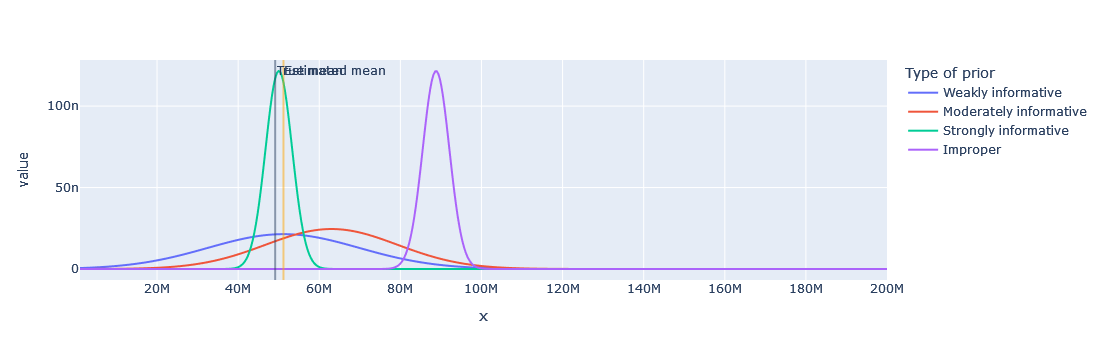

In [4]:
## Prior for a 99% probability that the true income
## is between 1e04 and 1e12:
mu01, sd01 = (1e12+1e04)/2, (1e12-1e04)/6
## Prior for a 99% probability that the true income
## is between 1e06 and 2e08:
mu02, sd02 = (2e08+1e06)/2, (2e08-1e06)/6
## Prior for a 99% probability that the true income
## is between 40e06 and 60e06:
mu03, sd03 = (4e07+6e07)/2, (6e07-4e07)/6
## Prior for a 99% probability that the true income
## is between 80e06 and 100e06:
mu04, sd04 = (1e08+8e07)/2, (1e08-8e07)/6
mu0s = [mu01, mu02, mu03, mu04]
sd0s = [sd01, sd02, sd03, sd04]

## Posterior parameter function:
def posterior_param(mu_prior, sd_prior, mu_data, sd_data, n):
  """
  Assumes that sd_data = true sd.
  """
  var_posterior = 1/(1/sd_prior**2 + n/sd_data**2)
  mu_posterior = var_posterior
  mu_posterior *= mu_prior/sd_prior**2 + n*mu_data/sd_data**2
  sd_posterior = np.sqrt(var_posterior)
  return (mu_posterior, sd_posterior)

## Compute the posterior probability densities:
x = np.linspace(1e06, 2e08, 501)
posterior_pdf = pd.DataFrame({'x': x})
pmus = []
psds = []
for i, name in enumerate(['Weakly informative',
                          'Moderately informative',
                          'Strongly informative',
                          'Improper']):
  pmu, psd = posterior_param(mu0s[i], sd0s[i], mu_estim, sd_estim, N)
  posterior_pdf[name] = norm.pdf(x, loc=pmu, scale=psd)
  pmus.append(pmu)
  psds.append(psd)

## Visualize the result:
posterior_pdf = posterior_pdf.melt(id_vars='x', var_name="Type of prior")
fig = px.line(posterior_pdf, x='x', y='value', color='Type of prior')
fig.add_vline(x=true_mean, annotation_text='True mean', opacity=0.5)
fig.add_vline(x=mu_estim, annotation_text='Estimated mean', opacity=0.5, line_color='orange')
fig.show()

## Compare the moderately informative prior and its posterior:
fig2 = px.line(posterior_pdf[posterior_pdf['Type of prior']=='Moderately informative'],
               x='x', y='value')
fig2.add_scatter(x=x, y=norm.pdf(x=x, loc=mu02, scale=sd02), line_dash='dash', name='Prior')
fig2.add_vline(x=true_mean, annotation_text='True mean', opacity=0.5)
fig2.add_vline(x=mu_estim, annotation_text='Estimated mean', opacity=0.5, line_color='orange')
fig2.show()

**Exercise 2.** In the last exercise, we've built a Bayesian model in which we've assumed that the data is normally distributed. However, we've already seen in the previous classes that this is not the case. In this exercise, we'll investigate the effect of assuming a wrong distribution on the estimation.  

Calculate the values of the probability density of the posterior predictive distribution (remember: the *posterior distribution* is about the parameters, the *posterior predictive distribution* is about the data!). Using `fig4.add_scatter()`, draw the distributions over the histogram generated in the cell below. Inspect the quality of fit (use the zoom functionality of Plotly to zoom in the low-income part).  

We will check how this assumption influences the root mean squared error of the estimators. The RMSE for a sample of estimator values $\hat{\mu}_1, \dots, \hat{\mu_N}$ is given by the formula

$$RMSE = \sqrt{\sum_{i=1}^N (\hat{\mu}_i - \mu)^2},$$
and is an approximation of the average error that we make on a single estimation.  

Estimate the root mean squared error (RMSE) of the frequentist estimator and bayesian estimators for two priors of your choice.
Compute arithmetic means and the means of the posterior distributions for 1000 independent samples of municipality incomes. Visualize them on histograms annotated with the true mean incomes. Compute the RMSE. Did the frequentist estimator outperform the Bayesian ones because of the improper assumption about the distribution of the data? Can you see the influence of the prior distribution on the distribution of the Bayesian estimator?

What is the posterior distribution of the mean and the Bayesian estimator in the case of a non-informative prior ($\sigma_0^{-2} = 0$)?

**Solution of Exercise 2**

The posterior predictive differs from the data distribution (obviously, it's normal), but not very much-it's actually more similar than I'd normally think.

Assuming a normal distribution of the data doesn't lead to decreased performance of this estimator. For the weakly informative prior, we get the same performance as for the frequentist. This is because in this model, for a large variance of the prior, the Bayesian estimator is just an arithmetic mean (to see this, plug $\sigma_0^{-2} = 0$ in the formulas from the notebook description).  

The moderately informative prior outperforms the frequentist estimator, because even though its assumptions are wrong, it has the variance-stabilizing effect.

On the distribution of the posterior means, we can see that the moderately informative prior shrinks the distribution, and that the little bump around 400M for the frequentist estimator moves to 100M.  

The RMSE of the frequentist estimator is approximately 50 mln PLN, which is huge - it's the same as the actual average income!

In [5]:
fig4 = px.histogram(x=income2020, histnorm='probability density', nbins=601)
x = np.linspace(0, max(income2020), 1001)

## Write the rest of your code here.

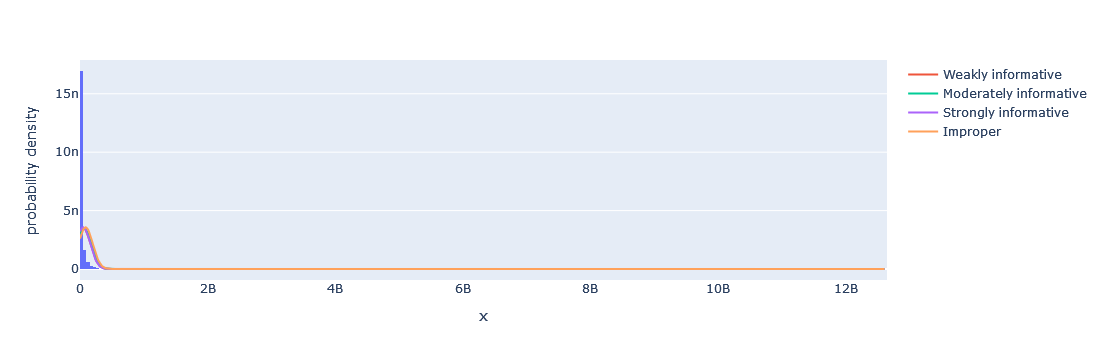

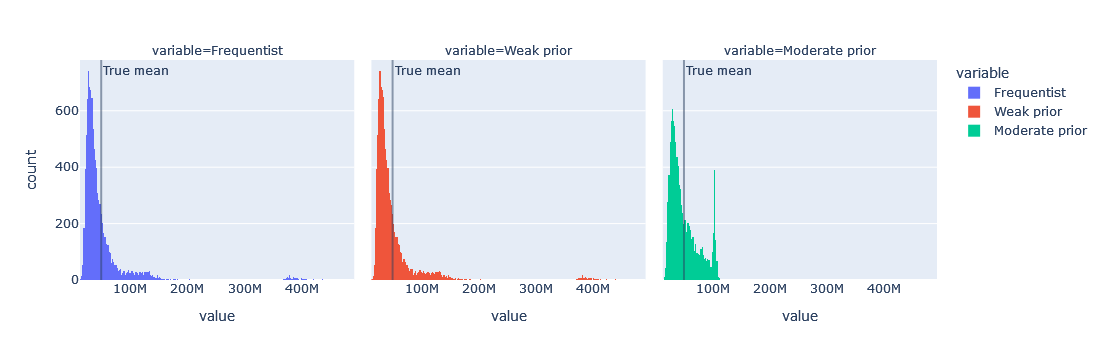

Frequentist log10-RMSE: 7.688922760815893
Weak prior log10-RMSE: 7.690969352110469
Moderate prior log10-RMSE: 7.393761554142297


In [6]:
## Visualize the posterior predictive (i.e. the fitted model)
## for the moderately informative prior.
fig4 = px.histogram(x=income2020, histnorm='probability density', nbins=601)
x = np.linspace(0, max(income2020), 1001)
for i, name in enumerate(['Weakly informative',
                          'Moderately informative',
                          'Strongly informative',
                          'Improper']):
  pmu, psd = posterior_param(mu0s[i], sd0s[i], mu_estim, sd_estim, N)
  y = norm.pdf(x, loc=pmu, scale=np.sqrt(psd**2 + sd_estim**2))
  fig4.add_scatter(x=x, y=y, name=name)
fig4.show()

## Compare the mean squared error of the frequentist mean
## and the bayesian estimators.
## Here, the bayesian estimator is the posterior mean
## (it's also the mean of the posterior predictive)
frequentist = []
weak_bayes = []
moderate_bayes = []
for i in range(10000):
  sample2 = income2020.sample(N)
  fmu, fsd = sample2.mean(), sample2.std()
  frequentist.append(fmu)
  wpmu, wpsd = posterior_param(mu01, sd01, fmu, fsd, N)
  weak_bayes.append(wpmu)
  mpmu, mpsd = posterior_param(mu02, sd02, fmu, fsd, N)
  moderate_bayes.append(mpmu)
frequentist = np.array(frequentist)
weak_bayes = np.array(weak_bayes)
moderate_bayes = np.array(moderate_bayes)

## Visualize the estimators
estimators = pd.DataFrame({'Frequentist': frequentist,
                           'Weak prior': weak_bayes,
                           'Moderate prior': moderate_bayes})
fig3 = px.histogram(estimators, facet_col='variable')
fig3.add_vline(x=true_mean, col='all', annotation_text='True mean', opacity=0.5)
fig3.show()

## Compute the log10 of the root mean squared error
print('Frequentist log10-RMSE:', np.log10(np.sqrt(np.mean(np.power(frequentist-true_mean, 2)))))
print('Weak prior log10-RMSE:', np.log10(np.sqrt(np.mean(np.power(weak_bayes-true_mean, 2)))))
print('Moderate prior log10-RMSE:', np.log10(np.sqrt(np.mean(np.power(moderate_bayes-true_mean, 2)))))